IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*LABADY Sterley Gilbert - GOJAK Zlatan*

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [23]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder
import random
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
#import sys
#sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
#import iads as iads

# importation de Classifiers
#from iads import Classifiers as cl

# importation de utils
#from iads import utils as ut

# importation de Clustering
#from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Un problème d'apprentissage supervisé

In [24]:
# Traitement des données
data = pd.read_csv("Donnees_Agribalyse/synthese.csv")

data_noms = []
data_noms.append("Sous-groupe d'aliment")
data_noms.append("Matériau d'emballage")
data_noms.append('Préparation')

label_enc = LabelEncoder() 
label_unique = data['Livraison'].unique()
label_set_i = label_enc.fit_transform(data['Livraison'])
label_set = np.array(data['Livraison'])
label_i_unique = []
for l in label_unique:
    ind = (np.where(label_set==l))[0][0]
    label_i_unique.append(label_set_i[ind])

data = data[data_noms]
demons = copy.deepcopy(np.array(data))
data = pd.get_dummies(data, columns = data_noms) 
data_desc = np.array(data)

demonstration = {}
for i in range(5):
    ind = random.randint(0, 2478)
    while ind in demonstration.keys():
        ind = random.randint(0, 2478)
    demonstration[ind] = [demons[ind], data_desc[ind]]
    
data_desc = data_desc.tolist()
label_set_i = label_set_i.tolist()
test_desc = []
test_label_set_i = []
indc = []
for i in range(479):
    ind = random.randint(0, 2478)
    while ind in indc or ind >= len(label_set_i):
        ind = random.randint(0, 2478)
    indc.append(ind)
    test_desc.append(data_desc[ind])
    test_label_set_i.append(label_set_i[ind])
    del data_desc[ind]
    del label_set_i[ind]
test_desc = np.array(test_desc)
test_label_set_i =  np.array(test_label_set_i)
data_desc = np.array(data_desc)
label_set_i =  np.array(label_set_i)

# Class correspondant à chaque y de Livraison
label_and_class = []
for i in range(len(label_unique)):
    tmp = []
    tmp.append(label_unique[i])
    tmp.append(label_i_unique[i])
    label_and_class.append(tmp)
print(label_and_class)

def get_livraison(class_):
    for l in label_and_class:
        if class_ == l[1]:
            return l[0]
get_livraison(4)

[['Ambiant (moyenne)', 2], ['Glacé', 4], ['Ambiant (long)', 1], ['Congelé', 3], ['Ambiant (court)', 0]]


'Glacé'

In [25]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    def train(self, desc_set, label_set):
        raise NotImplementedError("Please Implement this method")
    def score(self,x):
        raise NotImplementedError("Please Implement this method")
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    def accuracy(self, desc_set, label_set):
        count=0
        for i in range(len(label_set)):
              if self.predict(desc_set[i]) == label_set[i]:
                    count+=1
        return count/len(label_set)

In [26]:
class ClassifierKNN_Multi(Classifier):
    def __init__(self, input_dimension, k):
        self.input_dimension = input_dimension
        self.k=k
    def score(self,x):
        size = np.linalg.norm(self.desc_set-x, axis=1)
        argsort = np.argsort(size)
        dict_score = {}
        lab = []
        for i in argsort[:self.k]:
            the_lab = self.label_set[i]
            if the_lab not in lab:
                lab.append(the_lab)
                dict_score[the_lab] = 1
            else:
                dict_score[the_lab] = dict_score[the_lab] + 1
        return dict_score, lab
    def predict(self, x):
        dict_score, lab = self.score(x)
        ret = lab[0]
        max_score = dict_score[ret]
        for l in lab:
            if dict_score[l] > max_score:
                ret = l
        return ret
    def train(self, desc_set, label_set):      
        self.desc_set = desc_set
        self.label_set = label_set

Loading... 10 %
Loading... 30 %
Loading... 50 %
Loading... 70 %
Loading... 90 %


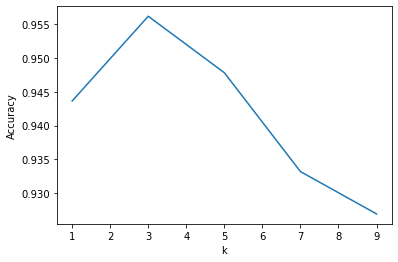

Meilleur K = 3 avec une accuracy de 0.9561586638830898


In [27]:
# Recherche du meilleur k
# on stocke les accuracies dans une liste :
accuracies = []
# seuil max des valeurs de k à regarder:
seuil_k = 10
# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]

k_acc = []

for i in (valeurs_k):
    print("Loading...",int(i/seuil_k*100),"%")
    ClassKNN = ClassifierKNN_Multi(len(data_desc[0]), i)
    ClassKNN.train(data_desc,label_set_i)
    acc = ClassKNN.accuracy(test_desc, test_label_set_i)
    accuracies.append(acc)
    tmp = []
    tmp.append(i)
    tmp.append(acc)
    k_acc.append(tmp)
# Tracé de la variation de l'accuracy en fonction de la valeur de k:
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

meilleur_k = k_acc[0][0]
meilleur_acc = k_acc[0][1]
for ka in k_acc:
    if ka[1] > meilleur_acc:
        meilleur_k = ka[0]
        meilleur_acc = ka[1]
        
print("Meilleur K =", meilleur_k,"avec une accuracy de", meilleur_acc)

In [28]:
# Création d'un classifieur KNN de dimension len(data_desc[0]):
un_KNN = ClassifierKNN_Multi(len(data_desc[0]),meilleur_k)
# Par définition, ce classifieur n'a pas besoin d'entraînement
un_KNN.train(data_desc,label_set_i)
# Affichage du taux de bonne classification   
print("Accuracy: ",un_KNN.accuracy(test_desc, test_label_set_i))

# Avoir la méthode de livraison pour quelques examples dans le test_desc
for k in demonstration.keys():
    print("\nex :", k)
    print("Aliments :", demonstration[k][0][0])
    print("Emballage :", demonstration[k][0][1])
    print("Préparation :", demonstration[k][0][2])
    print("----> Livraison :", get_livraison(un_KNN.predict(demonstration[k][1])))

Accuracy:  0.9561586638830898

ex : 1224
Aliments : gâteaux et pâtisseries
Emballage : PS
Préparation : Pas de préparation
----> Livraison : Ambiant (long)

ex : 353
Aliments : poissons cuits
Emballage : PP
Préparation : Four
----> Livraison : Glacé

ex : 1182
Aliments : charcuteries
Emballage : Déjà emballé - PP/PE
Préparation : Pas de préparation
----> Livraison : Glacé

ex : 2310
Aliments : pizzas, tartes et crêpes salées
Emballage : Carton
Préparation : Four 
----> Livraison : Glacé

ex : 2235
Aliments : soupes
Emballage : Carton
Préparation : Micro onde 
----> Livraison : Ambiant (long)


## Un problème d'apprentissage non supervisé

In [29]:
def normalisation(DataFrame):
    df = DataFrame.copy()
    for column in DataFrame.columns: 
        df[column] = (df[column] - df[column].min()) /( df[column].max() - df[column].min())
    return(df)

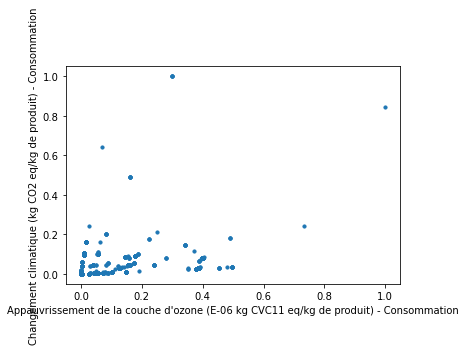

In [30]:
data = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
t1 = data.columns[25]
t2 = data.columns[19]
data_noms = []
data_noms.append(t1)
data_noms.append(t2)
data = data[data_noms]
data_2D_norm = normalisation(data)
data = np.array(data_2D_norm)
data = np.array(data)

plt.xlabel(t1)
plt.ylabel(t2)
plt.scatter(data[:,0],data[:,1], s = 10)
plt.show()

In [31]:
def dist_euclidienne(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

def dist_vect(v1, v2):
    return dist_euclidienne(v1, v2)

def centroide(DataFrame):
    data1 = np.array(DataFrame)
    res = np.mean(data1[:,-2:], axis=0)
    return res

def inertie_cluster(Ens):
    centro = centroide(Ens)
    s = 0
    Ens = np.array(Ens)
    for x in Ens:
        s += (dist_vect(x, centro))**2
    return s

def inertie_globale(Base, U):
    som = 0
    Base = np.array(Base)
    keys = U.keys()
    for k in keys:
        som += inertie_cluster(Base[U[k]])
    return som

def init_kmeans(K,Ens):
    Ens = np.array(Ens)
    k_examples = []
    k_ind = []
    for i in range(K):
        ind = random.randint(0, len(Ens)-1)
        while ind in k_ind:
            ind = random.randint(0, len(Ens)-1)
        k_ind.append(ind)
        k_examples.append(Ens[ind])
    return np.array(k_examples)

def plus_proche(Exe,Centres):
    ret = 0
    min_dist = dist_vect(Exe, Centres[0])
    for i in range(len(Centres)):
        if dist_vect(Exe, Centres[i]) < min_dist:
            ret = i
    return ret

def affecte_cluster(Base,Centres):
    dict = {}
    for i in range(len(Centres)):
        dict[i] = []
    Base = np.array(Base)
    for i in range(len(Base)):
        ind_pp = plus_proche(Base[i], Centres)
        dict[ind_pp].append(i)
    return dict

def nouveaux_centroides(Base,U):
    Base = np.array(Base)
    new_Centres = []
    keys = U.keys()
    for k in keys:
        new_Centres.append(centroide(Base[U[k]]))
    return np.array(new_Centres)

def kmoyennes(K, Base, epsilon, iter_max):
    centres_i = init_kmeans(K,Base)
    pre_inertie = 0
    for i in range(iter_max):
        affectations = affecte_cluster(Base,centres_i)
        centres_i = nouveaux_centroides(Base,affectations)
        inertie_i = inertie_globale(Base, affectations)
        if abs(pre_inertie-inertie_i) <= epsilon:
            break
        else:
            pre_inertie = inertie_i
    return centres_i, affectations

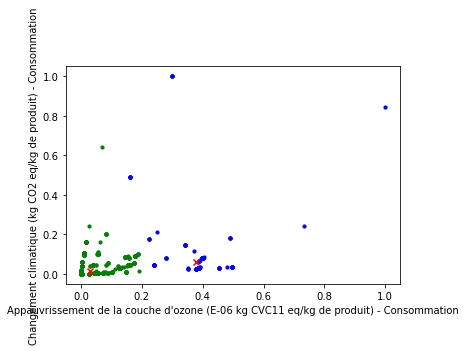

In [32]:
les_centres, l_affectation = kmoyennes(2, data, 0.001, 1000)

list_clust = []
for k in l_affectation.keys():
    tmp = []
    for l in l_affectation[k]:
        tmp.append(data[l])
    list_clust.append(tmp)

colors = ['b', 'g', 'y', 'c', 'm', 'k']
plt.xlabel(t1)
plt.ylabel(t2)
for cl in list_clust:
    if len(cl) > 0:
        plt.scatter(np.array(cl)[:,0],np.array(cl)[:,1],color=colors[0], s = 10)
        del colors[0]
        
plt.scatter(les_centres[:,0],les_centres[:,1],color='r',marker='x')
plt.show()

On a pu obtenir 2 clusters qui se distinguent par leur indice d'Appauvrissement de la couche d'ozone.
On peut classer ces aliments selon leur niveau d'impact sur la couche d'ozone.


A completer...
A completer...
A completer...
A completer...